In [ ]:
'''
 * Copyright (c) 2017 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Discussion: A Comparison of the Selection and Shrinkage Methods

In this section, we explore the relationships among different regression methods through a simple example involving two correlated inputs $X_1$ and $X_2$ with a correlation coefficient $\rho$. We assume that the true regression coefficients are $\beta_1 = 4$ and $\beta_2 = 2$.

## Coefficient Profiles

Figure 8 illustrates the coefficient profiles for various methods as their tuning parameters are varied. The analysis is divided into two cases based on the correlation:

- **Top Panel**: $\rho = 0.5$
- **Bottom Panel**: $\rho = -0.5$

### Method Behaviors

- **Ridge Regression**: 
    - Shrinks coefficients towards zero continuously until it converges to the least squares solution.
  
- **Principal Component Regression (PCR)** and **Partial Least Squares (PLS)**: 
    - Both exhibit similar behavior to ridge regression but do so in discrete steps. Their paths are more extreme compared to ridge.

- **Best Subset Selection**: 
    - Initially overshoots the least squares solution and subsequently backtracks.

- **Lasso Regression**: 
    - Shows an intermediate behavior between ridge regression and best subset selection.

### Negative Correlation

When the correlation is negative $(\rho = -0.5$), the following trends are observed:

- PLS and PCR continue to track the ridge path.
- All methods become more similar to one another.

## Shrinkage Behavior Comparison

- **Ridge Regression**: 
    - Shrinks all directions, with more shrinkage applied to low-variance directions.

- **Principal Components Regression**: 
    - Leaves $M$ high-variance directions untouched while discarding others.

- **Partial Least Squares**: 
    - Tends to shrink low-variance directions and can sometimes inflate higher variance directions, which may lead to instability and slightly higher prediction errors compared to ridge regression.

## Conclusion

According to the studies by Frank and Friedman (1993):

- **Ridge Regression**: Generally preferable for minimizing prediction error compared to variable subset selection, principal components regression, and partial least squares.
  
- **PLS, PCR, and Ridge Regression**: Tend to behave similarly, but ridge regression's smooth shrinkage may give it an edge.

- **Lasso Regression**: Falls between ridge regression and best subset regression, enjoying benefits from both approaches.


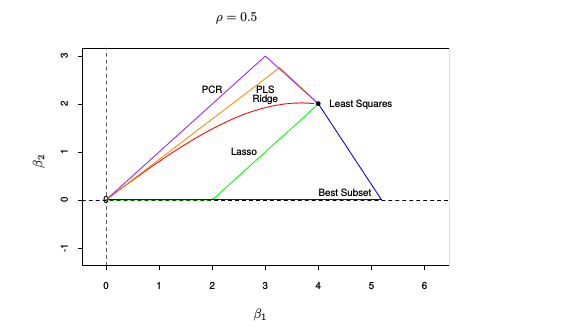
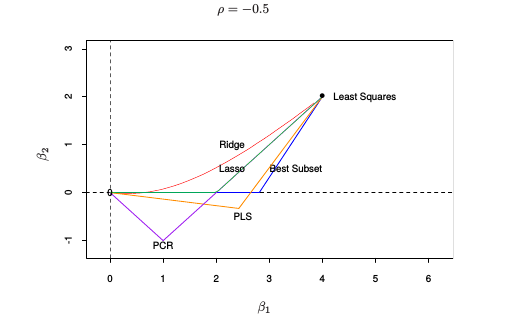
FIGURE 8. Coeﬃcient proﬁles from diﬀerent methods for a simple problem: two inputs with correlation ±0.5, and the true regression coeﬃcients β = (4, 2).

## Multiple Outcome Shrinkage and Selection

In a multiple-output linear model, the least squares estimates are simply the individual least squares estimates for each output. To apply selection and shrinkage methods in this context, one can either apply a univariate technique to each outcome individually or simultaneously to all outcomes.

### Ridge Regression

For ridge regression, we can apply the formula:

$$
\hat{\beta}_{\text{ridge}} = (X^TX + \lambda I)^{-1}X^TY
$$

to each of the $K$ columns of the outcome matrix $Y$, using possibly different regularization parameters $\lambda_1, \ldots, \lambda_K$, or apply it to all columns using the same value of $\lambda$.

- **Individual $\lambda$**: This approach allows different amounts of regularization for different outcomes but requires estimating $k$ separate regularization parameters.
- **Common $\lambda$**: This permits all $k$ outputs to estimate a single regularization parameter.

### Canonical Correlation Analysis (CCA)

More sophisticated shrinkage and selection strategies exploit correlations in the different responses. For instance, if we have:

$$
Y_k = f(X) + \epsilon_k 
$$
$$
Y_\ell = f(X) + \epsilon_\ell
$$

where both outputs share the same structural part $f(X)$, it makes sense to pool observations on $Y_k$ and $Y_\ell$ to estimate the common $f$.

### CCA Overview

Canonical correlation analysis (CCA) is a data reduction technique developed for the multiple output case. Similar to principal component analysis (PCA), CCA finds a sequence of uncorrelated linear combinations $Xv_m$ of the predictors $x_j$ and corresponding uncorrelated linear combinations $Y u_m$ of the responses $y_k$ such that the correlations:

$$
\text{Corr}^2(Y u_m, X v_m)
$$

are maximized. At most $M = \min(K, p)$ directions can be found.

## Reduced-Rank Regression

Reduced-rank regression formalizes the pooling of information. Given an error covariance $text{Cov}(\epsilon) = \Sigma$, we solve the following restricted multivariate regression problem:

$$
\hat{B}_{rr}(m) = \arg\min \sum_{i=1}^{N} (y_i - B^T x_i)^T \Sigma^{-1} (y_i - B^T x_i)
$$

subject to $\text{rank}(B) = m$.

When $\Sigma$ is replaced with the estimate $\frac{Y^T Y}{N}$, the solution becomes:

$$
\hat{B}_{rr}(m) = \hat{B} U_m U_m^{-1}
$$

where $U_m$ is the $K \times m$ sub-matrix of $U$ consisting of the first $m$ columns, and $U$ is the $K \times M$ matrix of left canonical vectors.

### Fitted Response

The fitted response is given by:

$$
\hat{Y}_{rr}(m) = X(X^T X)^{-1} X^T Y U_m U_m^{-1} = H Y P_m
$$

where $H$ is the usual linear regression projection operator and $P_m$ is the rank-$m$ CCA response projection operator.

## Shrinkage Models

Breiman and Friedman (1997) explored shrinkage of the canonical variates between \(X\) and \(Y\), proposing a smooth version of reduced-rank regression. Their approach can be expressed as:

$$
\hat{B}_{c+w} = \hat{B} U \Lambda U^{-1}
$$

where \(\Lambda\) is a diagonal shrinkage matrix. The diagonal entries are defined as:

$$
c_m^2 \lambda_m = \frac{p}{c_m^2 + N (1 - c_m^2)}
$$

where $c_m$ is the $m$th canonical correlation coefficient.

The fitted response under this model is:

$$
\hat{Y}_{c+w} = H Y S_{c+w}
$$

where $S_{c+w} = U \Lambda U^{-1}$ is the response shrinkage operator.

Breiman and Friedman also suggested shrinking in both the $Y$ space and the $X$ space, leading to hybrid shrinkage models of the form:

$$
\hat{Y}_{\text{ridge},c+w} = A_\lambda Y S_{c+w}
$$

where

$$
A_\lambda = X(X^T X + \lambda I)^{-1} X^T
$$

is the ridge regression shrinkage operator.
